# İş Uygulaması: ML Modelinin Başarı Testi (AB Testi)

## Problem:
### Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.

## Detaylar:
### Model geliştirilmiş ve web sitesine entegre edilmiş.
### Site kullanıcıları belirli bir kuralara göre ikiye bölünmüş olsun.
### A grubu eski, B grubu yeni sistem.
### Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

# Hipotezimiz:

### H0: M1 = M2
### H1: M1 != M2

# Veri Tipi I

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 28, 38, 37, 37, 30, 32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis=1)
A_B.columns = ['A', 'B']

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


# Veri Tipi II

In [14]:
A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 25, 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])
B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 28, 38, 37, 37, 30, 32, 31, 31, 27, 32, 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])


# A ve A 'nın grubu
grup_a = np.arange(len(A))
grup_a = pd.DataFrame(grup_a)
grup_a[:] = 'A'

a = pd.concat([grup_a, A], axis=1)


# B ve B'nin grubu
grup_b = np.arange(len(B))
grup_b = pd.DataFrame(grup_b)
grup_b[:] = 'B'

b = pd.concat([grup_b, B], axis=1)


# Tüm Veri

ab = pd.concat([a, b])
ab.columns = ['Grup', 'Gelir']

In [15]:
ab.head()

,Grup,Gelir
0,A,30
1,A,27
2,A,21
3,A,27
4,A,29


In [16]:
ab.tail()

,Grup,Gelir
25,B,33
26,B,26
27,B,32
28,B,33
29,B,29


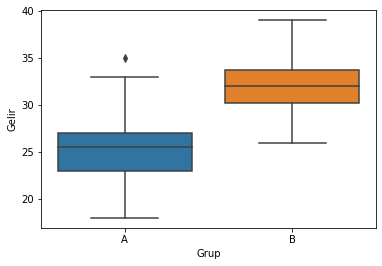

In [19]:
sns.boxplot(data = ab, x='Grup', y='Gelir');
# B yani yeni ML 'nin geliri daha yüksek gözüküyor.

# Normallik Varsayımı

In [30]:
from scipy.stats import *
import scipy.stats as stats

In [31]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [32]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

# Varyans Homojenliği Varsayımı

## H0: Varyanslar Homojendir.
## H1: Varyanslar Homojen Değildir.

In [40]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158001, pvalue=0.2964124900636569)

# Hipotez Testi

In [41]:
test_statistic, p_value = stats.ttest_ind(A_B['A'], A_B['B'], equal_var =  True)
print('Test İstatistiği: %.4f, P-Değeri: %.4f' % (test_statistic, p_value))

Test İstatistiği: -7.0287, P-Değeri: 0.0000


### P-Value değeri 0.05 'den küçük olduğu için H0 hipotezi reddedilir.

# Nonparametrik Bağımsız İki Örneklem Testi

In [42]:
stats.mannwhitneyu(A_B['A'], A_B['B'])

MannwhitneyuResult(statistic=89.5, pvalue=9.557950378612535e-08)

In [43]:
test_statistic, p_value = stats.mannwhitneyu(A_B['A'], A_B['B'])
print('Test İstatistiği: %.4f, P-Değeri: %.4f' % (test_statistic, p_value))

Test İstatistiği: 89.5000, P-Değeri: 0.0000
